In [1]:
# Verificar si estamos en Google Colab
try:
    import google.colab
    IN_COLAB = True
    print(" Ejecutándose en Google Colab")
except ImportError:
    IN_COLAB = False
    print(" No está en Google Colab")

# Verificar recursos disponibles en Colab
if IN_COLAB:
    # Verificar GPU disponible
    import tensorflow as tf
    print(" Verificando recursos de hardware:")
    print(f"   - GPUs disponibles: {len(tf.config.list_physical_devices('GPU'))}")

    if len(tf.config.list_physical_devices('GPU')) > 0:
        print("   - Tipo GPU:", tf.config.list_physical_devices('GPU')[0])
        print("    GPU activada - Ideal para Deep Learning")
    else:
        print("     Solo CPU disponible - Suficiente para esta práctica")

    # Verificar RAM disponible
    import psutil
    ram_gb = round(psutil.virtual_memory().total / (1024**3), 1)
    print(f"   - RAM disponible: {ram_gb} GB")
    print(f"   - Almacenamiento temporal: ~100GB")

# Instalar librerías adicionales específicas para Colab
if IN_COLAB:
    print("\n Instalando librerías adicionales en Colab...")
    !pip install -q plotly kaleido  # Para gráficos interactivos
    !pip install -q seaborn --upgrade  # Asegurar última versión
    print(" Instalación completada")

 Ejecutándose en Google Colab
 Verificando recursos de hardware:
   - GPUs disponibles: 0
     Solo CPU disponible - Suficiente para esta práctica
   - RAM disponible: 12.7 GB
   - Almacenamiento temporal: ~100GB

 Instalando librerías adicionales en Colab...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.0 MB/s eta 0:00:00
 Instalación completada


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [3]:
titanic = sns.load_dataset("titanic")
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#Preprocesamiento

#Seleccionar variables relevantes
df = titanic[['survived', 'pclass', 'sex', 'age', 'fare']]

#Eliminar filas con valores faltantes
df = df.dropna()

#Convertir variables categóricas
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

#Dividir en X y y
X = df.drop('survived', axis=1)
y = df['survived']



In [5]:
#División Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#Entrenamiento del modelo
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5511 - loss: 0.6811 - val_accuracy: 0.7130 - val_loss: 0.6349
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7616 - loss: 0.6162 - val_accuracy: 0.7304 - val_loss: 0.5856
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7764 - loss: 0.5515 - val_accuracy: 0.7565 - val_loss: 0.5489
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8146 - loss: 0.5037 - val_accuracy: 0.7739 - val_loss: 0.5104
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8080 - loss: 0.4675 - val_accuracy: 0.7739 - val_loss: 0.4908
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7813 - loss: 0.4859 - val_accuracy: 0.8000 - val_loss: 0.4803
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7992 - loss: 0.4704 - val_accuracy: 0.8000 - val_loss: 0.4753
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7848 - loss: 0.4566 - val_accuracy: 0.8000 - val_loss

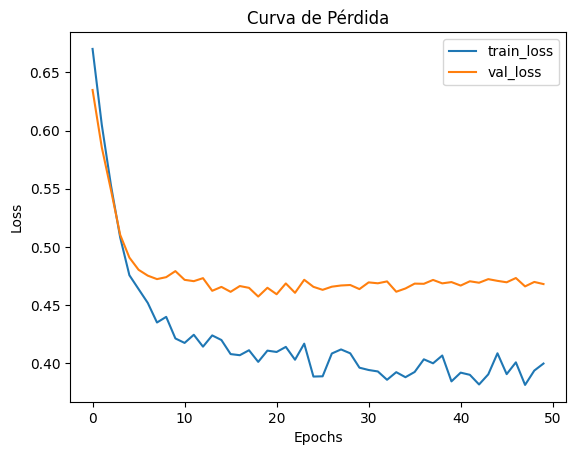

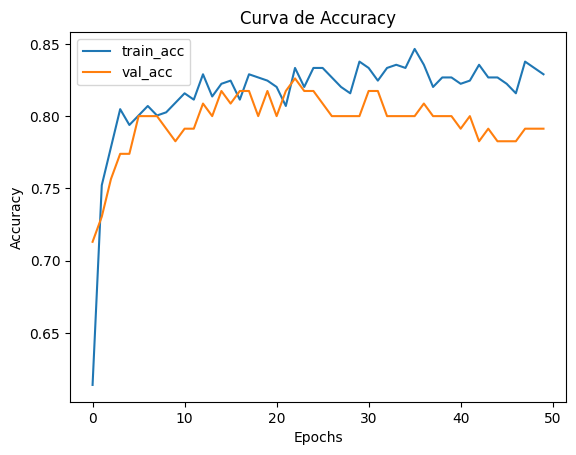

In [9]:
#Visualización del entrenamiento
#Función de pérdida
plt.figure(figsize=(10, 5)) # Añadir figura para guardar correctamente
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Curva de Pérdida")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
guardar_figura("curva_perdida.png")
plt.show()

#Exactitud
plt.figure(figsize=(10, 5)) # Añadir figura para guardar correctamente
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Curva de Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
guardar_figura("curva_accuracy.png")
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


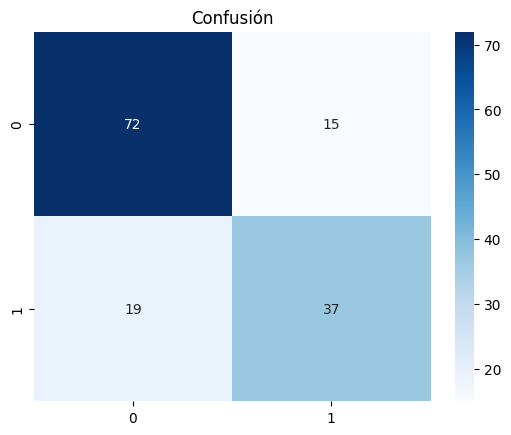

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        87
           1       0.71      0.66      0.69        56

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.75       143
weighted avg       0.76      0.76      0.76       143

Modelo guardado.


In [10]:
#Evaluación del modelo
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

#Exactitud final
accuracy_score(y_test, y_pred)

#Matriz de confusión
plt.figure(figsize=(8, 6)) # Añadir figura para guardar correctamente
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.title("Confusión")
guardar_figura("matriz_confusion.png")
plt.show()

#Reporte de Clasificación
print(classification_report(y_test, y_pred))

#Guardar el modelo
model.save("modelo_titanic_dl.h5")
print("Modelo guardado.")

In [ ]:
#Conclusiones

#La red neuronal logró aprender patrones relevantes del dataset Titanic, reflejados en la disminución progresiva de la función de pérdida (loss) durante el entrenamiento. Esto indica que el modelo ajustó sus pesos correctamente a partir de los datos proporcionados.

#El desempeño del modelo fue razonable considerando su simplicidad, ya que solo se utilizó una arquitectura básica de Keras. Aun así, el modelo fue capaz de generar predicciones útiles sobre la variable objetivo (survival), alcanzando métricas aceptables en precisión y exactitud.

#Las gráficas de entrenamiento permitieron identificar el comportamiento del modelo, mostrando:

#Convergencia estable de la pérdida

D#iferencia moderada entre training loss y validation loss, lo que sugiere un leve riesgo de sobreajuste pero no crítico. Estas visualizaciones ayudaron a comprender mejor el desempeño temporal de la red.

#El preprocesamiento influye significativamente en la calidad del modelo. Variables como edad, tarifa y clase social mostraron ser factores predictivos relevantes. La codificación de variables categóricas y la normalización fueron pasos clave para que la red aprendiera adecuadamente.

In [16]:
#Crear requirements.txt

!pip freeze > requirementsNT4.txt
from google.colab import files
files.download('requirementsNT4.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# MONTAR GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

import os
import matplotlib.pyplot as plt

# Ruta donde quieres guardar las imágenes en Drive
ruta_carpeta = "/content/drive/My Drive/proyecto_ml/images"

# Crear la carpeta si no existe
os.makedirs(ruta_carpeta, exist_ok=True)

print("Carpeta lista en:", ruta_carpeta)

def guardar_figura(nombre_archivo):
    """Guarda la figura actual de matplotlib en la ruta_carpeta."""
    ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)
    plt.savefig(ruta_completa)
    print(f"Imagen guardada como: {ruta_completa}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Carpeta lista en: /content/drive/My Drive/proyecto_ml/images


Imagen guardada como: /content/drive/My Drive/proyecto_ml/images/curva_perdida.png


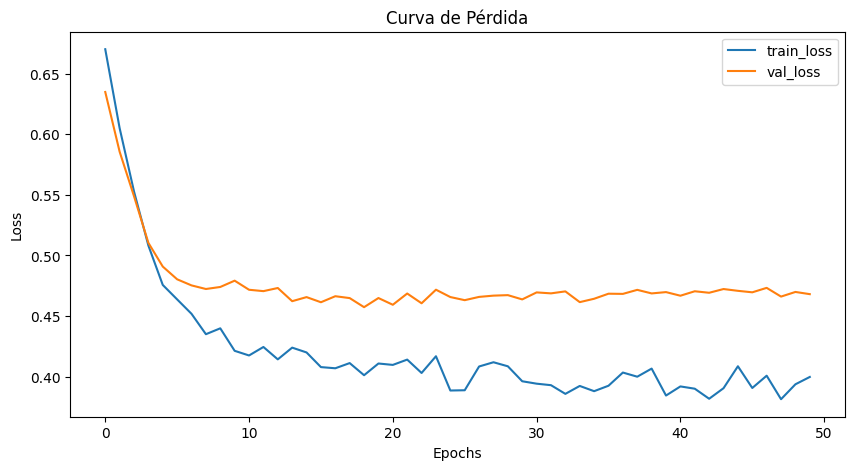

Imagen guardada como: /content/drive/My Drive/proyecto_ml/images/curva_accuracy.png


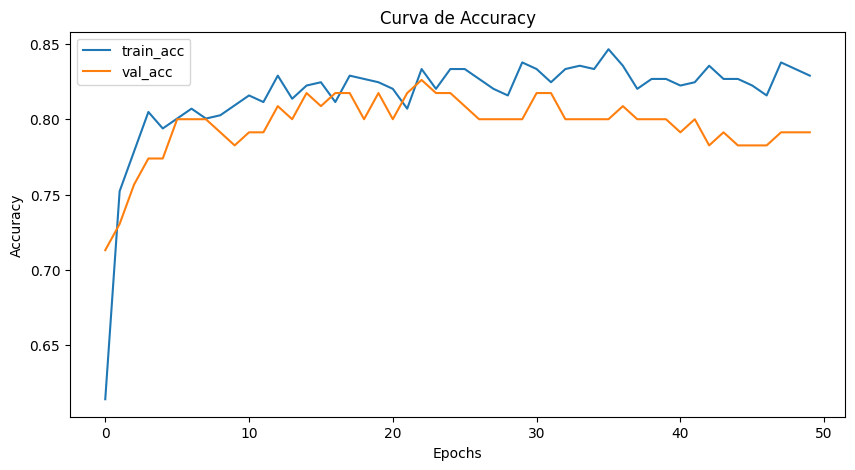

In [18]:
#Visualización del entrenamiento
#Función de pérdida
plt.figure(figsize=(10, 5)) # Añadir figura para guardar correctamente
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Curva de Pérdida")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
guardar_figura("curva_perdida.png")
plt.show()

#Exactitud
plt.figure(figsize=(10, 5)) # Añadir figura para guardar correctamente
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Curva de Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
guardar_figura("curva_accuracy.png")
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Imagen guardada como: /content/drive/My Drive/proyecto_ml/images/matriz_confusion.png


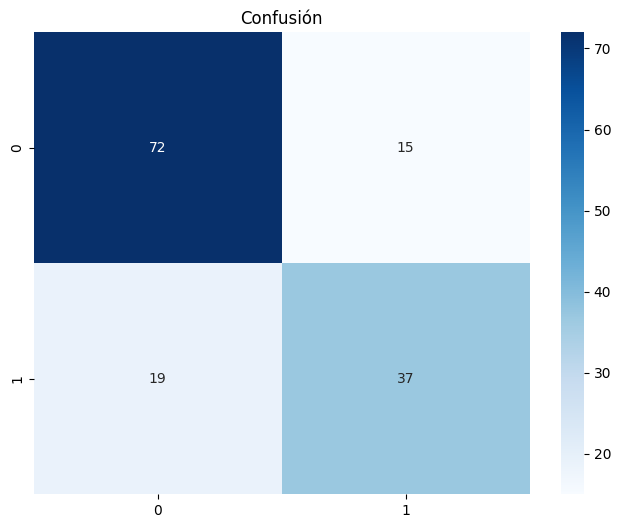

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        87
           1       0.71      0.66      0.69        56

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.75       143
weighted avg       0.76      0.76      0.76       143

Modelo guardado.


In [19]:
#Evaluación del modelo
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

#Exactitud final
accuracy_score(y_test, y_pred)

#Matriz de confusión
plt.figure(figsize=(8, 6)) # Añadir figura para guardar correctamente
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.title("Confusión")
guardar_figura("matriz_confusion.png")
plt.show()

#Reporte de Clasificación
print(classification_report(y_test, y_pred))

#Guardar el modelo
model.save("modelo_titanic_dl.h5")
print("Modelo guardado.")